# Deep Learning - Nasir Hussain - 2021/09/18

# 7 Working with Keras: A deep dive

## 7.1 A spectrum of workflows

- design of the Keras API is guided by the principle of progressive disclosure of complexity
  - make it easy to get started, yet make it possible to handle high-complexity use cases, only requiring incremental learning at each step
  - Simple use cases should be easy and approachable, and arbitrarily advanced workflows should be possible: no matter how niche and complex the thing you want to do, there should be a clear path to it
  - components from any workflow can be used in any other workflow

## 7.2 Different ways to build Keras models

- The Sequential model
  - the most approachable API
  - it’s basically a Python list. As such, it’s limited to simple stacks of layers.
- The Functional API
  - focuses on graph-like model architectures. 
  - It represents a nice mid-point between usability and flexibility
  - it’s the most commonly used model-building API.
- Model subclassing
  - a low-level option where you write everything yourself from scratch.
  - This is ideal if you want full control over every little thing
  - you won’t get access to many built-in Keras features, and you will be more at risk of making mistakes

### 7.2.1 The Sequential model

- one input one output
- consists of a linear stack of layers

In [ ]:
# Listing 7.1 The Sequential class
from tensorflow import keras 
from tensorflow.keras import layers
 
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(10, activation="softmax")
])

In [ ]:
# Listing 7.2 Incrementally building a Sequential model
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

- layers only get built (create their weights) when they are called for the first time. 
- the shape of the layers' weights depends on the shape of their input

In [ ]:
# Listing 7.3 Models that aren’t yet built have no weights
'''
model.weights
'''
# ValueError: 
  # Weights for model sequential_1 have not yet been created. 
  # Weights are created when the Model is first called on inputs 
  # or `build()` is called with an `input_shape`.

'\nmodel.weights\n'

In [ ]:
# Listing 7.4 Calling a model for the first time to build it
model.build(input_shape=(None,3))
model.weights 

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.18752009, -0.07178029, -0.17134206,  0.1957055 ,  0.15640113,
         -0.2598126 , -0.16850415, -0.16757278, -0.17523742, -0.06304644,
          0.19055864, -0.16463926, -0.05040774,  0.07711866,  0.00221691,
         -0.28047436, -0.13938734,  0.17615244,  0.12272123,  0.03415766,
          0.18606618, -0.04651031, -0.29289004,  0.29558426, -0.17226644,
         -0.2873154 ,  0.20281547, -0.11082695,  0.06342602,  0.05550465,
         -0.20164531,  0.2851783 ,  0.18606055,  0.08841908, -0.02984419,
          0.13083926,  0.24895173,  0.21331674, -0.03665218,  0.26750565,
          0.09057885, -0.20010877, -0.09718661, -0.08821632,  0.13238528,
         -0.19345884,  0.12238595,  0.1830352 , -0.28122708, -0.22560385,
          0.09632638, -0.2575013 , -0.16140565, -0.17413631, -0.12679859,
         -0.0197466 ,  0.20543218,  0.00161901, -0.23085688, -0.24981989,
          0.17573065, -0.21231425,  0.04466

- display its contents via the summary() method

In [ ]:
# Listing 7.5 The summary() method
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Listing 7.6 Naming models and layers with the name argument
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


- specifying input shape in advance can help to analyze model at each step

In [ ]:
# Listing 7.7 Specifying the input shape of your model in advance
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### 7.2.2 The Functional API

#### A SIMPLE EXAMPLE

In [ ]:
# Listing 7.8 A simple Functional model with two Dense layers

# define inputs to the model and its name
# processed in batches
inputs = keras.Input(shape=(3,), name="my_input")
print("*** Inputs ***")
print(inputs.shape)
print(inputs.dtype)

# a layer based on the inputs
features = layers.Dense(64, activation="relu")(inputs)
print("*** Features ***")
print(features.shape)

# a layer based on outputs
outputs = layers.Dense(10, activation="softmax")(features)
print("*** Outputs ***")
print(outputs.shape)

# create a model based on inputs and outputs
model = keras.Model(inputs=inputs, outputs=outputs)

print("*** Model ***")
model.summary()


*** Inputs ***
(None, 3)
<dtype: 'float32'>
*** Features ***
(None, 64)
*** Outputs ***
(None, 10)
*** Model ***
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### MULTI-INPUT, MULTI-OUTPUT MODELS

- build a system to rank customer support tickets by priority and route them to the appropriate department. 
  - three inputs
    - The title of the ticket (text input)
    - The text body of the ticket (text input)
    - tags added by the user (categorical input, assumed here to be one-hot encoded)
  - two outputs:
    - The priority score of the ticket, a scalar between 0 and 1 (sigmoid output)
    - The department that should handle the ticket (a softmax over the set of departments)


In [ ]:
# Listing 7.9 A multi-input, multi-output Functional model
vocabulary_size = 10000
num_tags = 100
num_departments = 4
 
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")
features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(num_departments, activation="softmax", name="department")(features)
model = keras.Model(inputs=[title, text_body, tags],outputs=[priority, department])

#### TRAINING A MULTI-INPUT, MULTI-OUTPUT MODE

In [ ]:
# Listing 7.10 Training a model by providing lists of input and target arrays

# need to take order in consideration

import numpy as np
num_samples = 1280
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))
model.compile(
    optimizer="rmsprop",
    loss=["mean_squared_error", "categorical_crossentropy"],
    metrics=[["mean_absolute_error"], ["accuracy"]]
)
model.fit(
    [title_data, text_body_data, tags_data],
    [priority_data, department_data],
    epochs=1
)
model.evaluate([title_data, text_body_data, tags_data],[priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 1s 8ms/step - loss: 21.1910 - priority_loss: 0.3346 - department_loss: 20.8564 - priority_mean_absolute_error: 0.5014 - department_accuracy: 0.1297


In [ ]:
# Listing 7.11 Training a model by providing dicts of input and target arrays

# no need to take order in consideration

model.compile(
    optimizer="rmsprop",
    loss={
        "priority": "mean_squared_error", 
        "department": "categorical_crossentropy"
    },
    metrics={
        "priority": ["mean_absolute_error"],
        "department": ["accuracy"]
    }
)
model.fit(
    {
      "title": title_data, 
      "text_body": text_body_data,
      "tags": tags_data
     },
    {
      "priority": priority_data,
      "department": department_data
    },
    epochs=1
)
model.evaluate(
    {
      "title": title_data, 
      "text_body": text_body_data,
      "tags": tags_data
    },
    {
      "priority": priority_data,
      "department": department_data
    }
)
priority_preds, department_preds = model.predict(
    {
      "title": title_data,
      "text_body": text_body_data, 
      "tags": tags_data
    }
)

40/40 [==============================] - 1s 9ms/step - loss: 24.5373 - priority_loss: 0.3346 - department_loss: 24.2028 - priority_mean_absolute_error: 0.5014 - department_accuracy: 0.5648


#### THE POWER OF THE FUNCTIONAL API: ACCESS TO LAYER CONNECTIVITY

- possible to inspect how layers are connected and reuse previous graph nodes (which are layer outputs) as part of new models. 

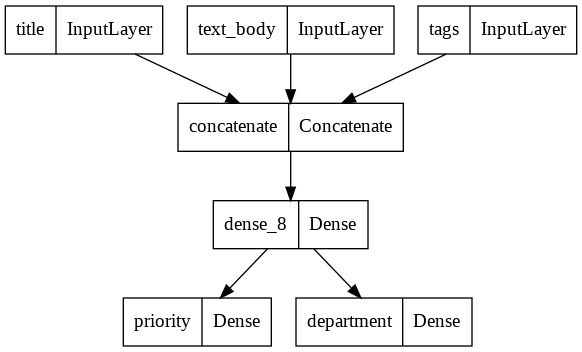

In [ ]:
# plot a Functional model as a graph with the plot_model()
keras.utils.plot_model(model, "ticket_classifier.png")

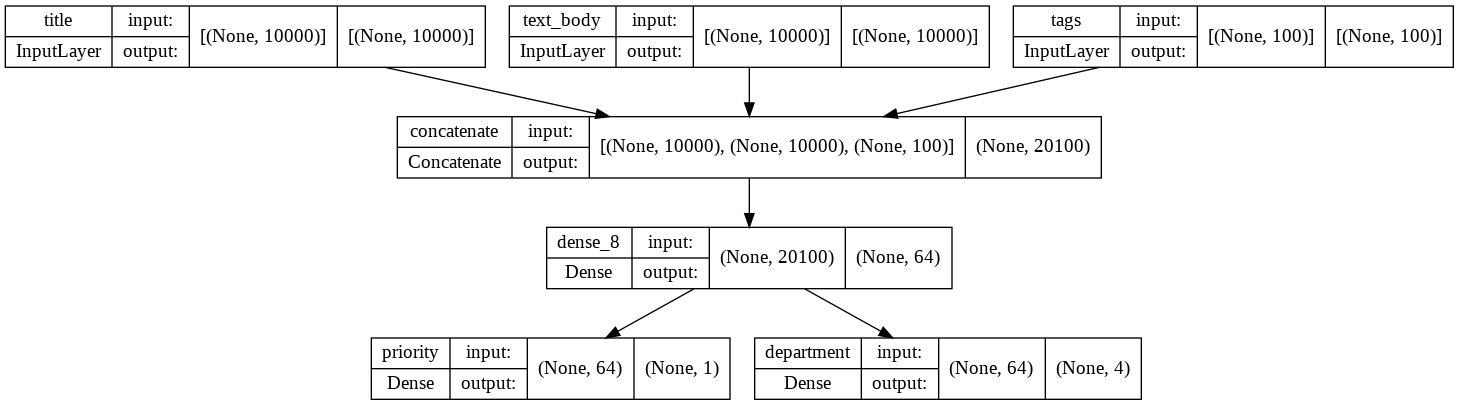

In [ ]:
# add to this plot the input and output shapes of each layer in the model
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

- model.layers model property provides the list of layers that make up the model
- for each layer you can query layer.input and layer.output

In [ ]:
# Listing 7.12 Retrieving the inputs or outputs of a layer in a Functional model
model.layers

In [ ]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [ ]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

-  add an output to the previous model
  - you want to estimate how long a given issue ticket will take to resolve
  - a kind of difficulty rating. 
  - classification layer over three categories: “quick,” “medium,” and “difficult.” 

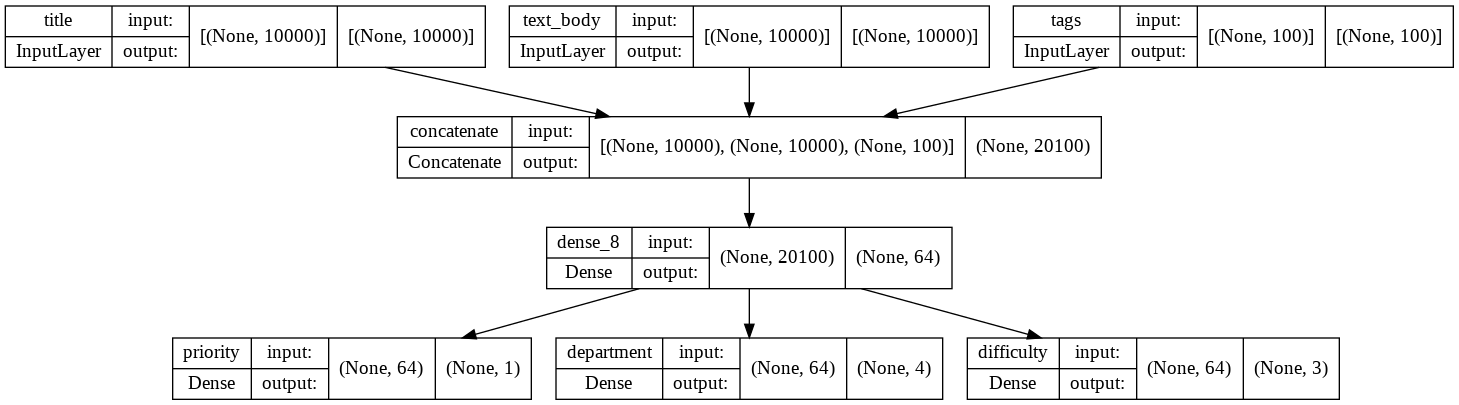

In [ ]:
# Listing 7.13 Creating a new model by reusing intermediate layer outputs
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features) 
new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

### 7.0.1.4 Directed acyclic graphs of layers

- functional API
  - you can build models with multiple inputs and multiple outputs
  - you can also implement networks with a complex internal topology
- Neural networks in Keras are allowed to be arbitrary directed acyclic graphs of layers. 
- It’s impossible for a tensor x to become the input of one of the layers that generated x.
- The only processing loops that are allowed are those internal to recurrent layers.
- Several common neural-network components are implemented as graphs. 
  - Inception modules
  - residual connections

#### INCEPTION MODULES

- consists of a stack of modules that themselves look like small independent networks, split into several parallel branches
- helps the network separately learn spatial features and channel-wise features, which is more efficient than learning them jointly

#### RESIDUAL CONNECTIONS

- tackle two common problems
  - vanishing gradients
  - representational bottlenecks
- A residual connection consists of making the output of an earlier layer available as input to a later layer, effectively creating a shortcut in a sequential network. 
- Rather than being concatenated to the later activation, the earlier output is summed with the later activation, which assumes that both activations are the same size

### 7.0.1.5 Layer weight sharing

- Important feature of the functional API is the ability to reuse a layer instance several times. 
- When you call a layer instance twice, instead of instantiating a new layer for each call, you reuse the same weights with every call.

### 7.0.1.6 Models as layers

- the functional API, models can be used as you’d use layers

### 7.2.3 Subclassing the Model class

- In the `__init__()` method, define the layers the model will use.
- In the call() method, define the forward pass of the model, reusing the layers previously created.
- Instantiate your subclass, and call it on data to create its weights.

In [ ]:
# Listing 7.14 A simple subclassed model

# customer support ticket management model

class CustomerTicketModel(keras.Model):
  def __init__(self, num_departments):
    super().__init__()
    self.concat_layer = layers.Concatenate()
    self.mixing_layer = layers.Dense(64, activation="relu")
    self.priority_scorer = layers.Dense(1, activation="sigmoid")
    self.department_classifier = layers.Dense(num_departments, activation="softmax")
  
  def call(self, inputs):
    title = inputs["title"]
    text_body = inputs["text_body"]
    tags = inputs["tags"]
    features = self.concat_layer([title, text_body, tags])
    features = self.mixing_layer(features)
    priority = self.priority_scorer(features)
    department = self.department_classifier(features)
    return priority, department

In [ ]:
# instantiate
model = CustomerTicketModel(num_departments=4)

priority, department = model({"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [ ]:
# compile and train

model.compile(
    optimizer="rmsprop",
    loss=["mean_squared_error", "categorical_crossentropy"],
    metrics=[["mean_absolute_error"], ["accuracy"]])

model.fit(
    {
      "title": title_data,
      "text_body": text_body_data,
      "tags": tags_data
    },
    [priority_data, department_data],
    epochs=1
)

model.evaluate(
    {
      "title": title_data,
      "text_body": text_body_data,
      "tags": tags_data
    },
    [priority_data, department_data]
)

priority_preds, department_preds = model.predict(
    {
      "title": title_data,
      "text_body": text_body_data,
      "tags": tags_data
     }
)

40/40 [==============================] - 1s 12ms/step - loss: 32.6701 - output_1_loss: 0.3319 - output_2_loss: 32.3382 - output_1_mean_absolute_error: 0.4986 - output_2_accuracy: 0.5656


- model subclassing enables you to build models that cannot be expressed as directed acyclic graphs of layers

#### BEWARE: WHAT SUBCLASSED MODELS DON’T SUPPORT

- Functional model
  - explicit data structure
  - view, inspect, and modify
- subclassed model 
  - is a piece of bytecode
  - responsible for more of the model logic
  - more debugging work to do
  - Limitations
    - Calling summary() will not display layer connectivity
    - you cannot plot the model topology via plot_model()
    - you cannot access the nodes of the graph of layers to do feature extraction
    - Once the model is instantiated, its forward pass becomes a complete black box

### 7.2.4 Mixing and matching different components

In [ ]:
# 7.2.4 Mixing and matching different components
class Classifier(keras.Model):
  def __init__(self, num_classes=2):
    super().__init__()
    if num_classes == 2:
      num_units = 1
      activation = "sigmoid"
    else:
      num_units = num_classes
      activation = "softmax"
      self.dense = layers.Dense(num_units, activation=activation)
  def call(self, inputs):
    return self.dense(inputs)
 
inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# Listing 7.16 Creating a subclassed model that includes a Functional model
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):
  def __init__(self, num_classes=2):
    super().__init__()
    self.dense = layers.Dense(64, activation="relu")
    self.classifier = binary_classifier
  def call(self, inputs):
    features = self.dense(inputs)
    return self.classifier(features)
 
model = MyModel()

### 7.2.5 Remember: Use the right tool for the job

- the Functional API provides you with a pretty good trade-off between ease of use and flexibility.
- It also gives you direct access to layer connectivity, which is very powerful for use cases such as model plotting or feature extraction. 
- If you can use the Functional API—that is, if your model can be expressed as a directed acyclic graph of layers

---